In [1]:
import ctypes

from ROOT import (
    TF1,
    TH1D,
    TH1F,
    TH2F,
    TH3F,
    TCanvas,
    TGraph2D,
    TLegend,
    TRandom,
    TRandom3,
    gRandom,
    gStyle,
    kBlue,
    kCyan,
)
from math import sin
%jsroot on

Welcome to JupyROOT 6.28/04


`声明：下面例子对于一些选项可能并不适合，这里仅仅是做部分演示`

## same:图叠加

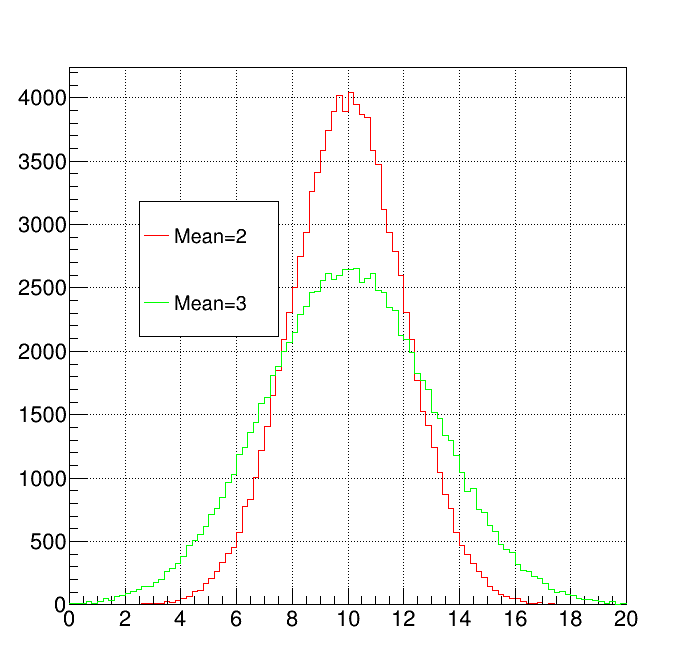

In [2]:
# 创建两个直方图对象，h1g1和h1g2，每个直方图有100个bin，取值范围在0到20之间
h1g1 = TH1D("h1g1", "", 100, 0, 20)
h1g2 = TH1D("h1g2", "", 100, 0, 20)

# 使用随机数种子生成器创建两个不同的种子值
seed1 = gRandom.Integer(10000)
seed2 = gRandom.Integer(10000)

# 使用不同的种子值创建两个TRandom3随机数生成器
rnd1 = TRandom3(seed1)
rnd2 = TRandom3(seed2)

# 使用随机数生成器填充直方图h1g1和h1g2
for i in range(100000):
    h1g1.Fill(rnd1.Gaus(10, 2))  # 使用均值10和标准差2生成正态分布的随机数并填充到h1g1
    h1g2.Fill(rnd2.Gaus(10, 3))  # 使用均值10和标准差3生成正态分布的随机数并填充到h1g2
# 绘制到一张图
c12 = TCanvas("c12", "c12", 700, 700)  # 创建一个名为"c11"的画布，大小为700x700像素
c12.SetGrid()  # 打开画布的网格

# 为关闭统计信息
h1g1.SetStats(0)
h1g2.SetStats(0)

# 创建一个图例对象，指定位置
leg = TLegend(0.2, 0.5, 0.4, 0.7)

# 向图例中添加条目，包括文本标签和线条样式
leg.AddEntry(h1g1, "Mean=2", "l")  # "l"表示绘制线条
leg.AddEntry(h1g2, "Mean=3", "l")  # "l"表示绘制线条

# 设置直方图h1g1和h1g2的线条颜色
h1g1.SetLineColor(2)  # 使用颜色2（红色）
h1g2.SetLineColor(3)  # 使用颜色3（绿色）

# 绘制直方图h1g1
h1g1.Draw()

# same 将新的绘图命令与已经存在的绘图重叠在一起，而不是清除已经存在的绘图。
# 这使您能够在同一个画布上绘制多个图形或直方图，以进行比较或叠加显示，而不会覆盖之前绘制的内容。
# 绘制直方图h1g2，并使用"same"选项将它们绘制在同一画布上
h1g2.Draw("same")

# 绘制图例，也使用"same"选项将图例绘制在同一画布上
leg.Draw()

# 显示画布c11
c12.Draw()

# 1D支持选项

| 选项   | 描述                                                                                          |
| ------ | ----------------------------------------------------------------------------------------------- |
| " "    | 默认选项。                                                                                    |
| "AH"   | 绘制直方图而不绘制坐标轴。 "A" 可以与任何绘制选项组合使用。例如，"AC" 绘制光滑的曲线直方图而不绘制坐标轴。 |
| "]["   | 选择此选项时，不绘制直方图的第一根和最后一根垂直线。                                      |
| "B"    | 条形图选项。                                                                                  |
| "BAR"  | 类似于选项 "B"，但可以以三维效果绘制条形。                                                   |
| "HBAR" | 类似于选项 "BAR"，但水平绘制条形。                                                           |
| "C"    | 绘制光滑的曲线通过直方图的箱子。                                                             |
| "E0"   | 绘制误差条。对于内容为0的箱子，会绘制标记。与E1或E2组合使用时，可以避免误差条被截断。          |
| "E1"   | 绘制带有垂直边缘的误差条。                                                                   |
| "E2"   | 绘制带有矩形的误差条。                                                                       |
| "E3"   | 绘制通过垂直误差条末端点的填充区域。                                                         |
| "E4"   | 绘制通过误差条末端点的平滑填充区域。                                                         |
| "E5"   | 类似于E3，但忽略内容为0的箱子。                                                               |
| "E6"   | 类似于E4，但忽略内容为0的箱子。                                                               |
| "X0"   | 与其中一个 "E" 选项一起使用时，抑制X轴上的误差条，就像 gStyle->SetErrorX(0) 一样。            |
| "L"    | 通过箱子内容绘制一条线。                                                                      |
| "P"    | 在每个箱子上绘制当前标记，除了空箱子。                                                       |
| "P*"   | 在每个箱子上绘制星形标记，除了空箱子。                                                       |
| "P0"   | 在每个箱子上绘制当前标记，包括空箱子。                                                       |
| "PIE"  | 绘制直方图作为饼图。                                                                         |
| "*H"   | 在每个箱子上绘制一个星号。                                                                    |
| "LF2"  | 像选项 "L" 一样绘制直方图，但带有填充区域。请注意，如果设置了直方图的填充颜色，"L" 也会绘制填充区域，但填充区域对应于直方图的轮廓。 |

In [3]:
c1 = TCanvas("c1", "c1", 600, 300)
h1d1 = TH1D("h1d", "", 100, 0, 10)

f1 = TF1("f1", "abs(sin(x)/x)*sqrt(x)", 0, 10)  # abs(sin(x)/x)*sqrt(x) -> 函数表达式
for i in range(100):
    num_tmp = f1.GetRandom()  # 生成随机数
    h1d1.Fill(num_tmp)

## 默认选项

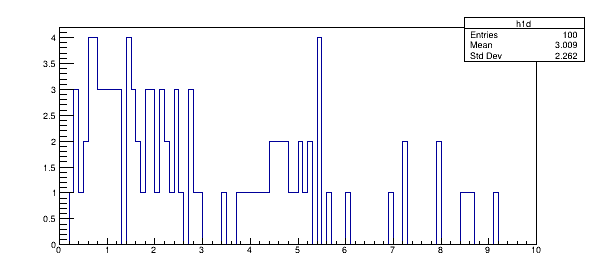

In [4]:
h1d1.Draw()
c1.Draw()

## AH:绘制直方图而不绘制坐标轴

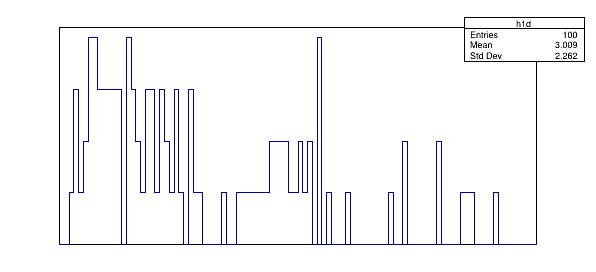

In [5]:
h1d1.Draw("AH")
c1.Draw()

## *H:在每个箱子上绘制一个星号。

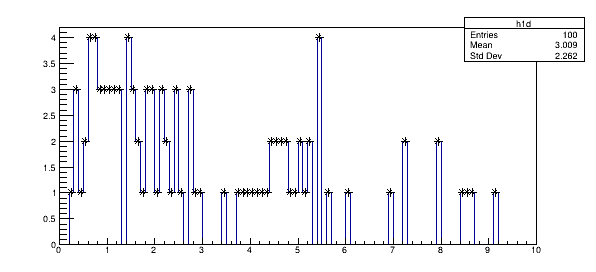

In [6]:
h1d1.Draw("*H")
c1.Draw()

# 2D支持选项

| 选项      | 描述                                                                                                 |
| --------- | ---------------------------------------------------------------------------------------------------- |
| " "       | 默认选项（彩色绘图）。                                                                               |
| "ARR"     | 箭头模式。显示相邻单元格之间的梯度。                                                                  |
| "BOX"     | 为每个单元格绘制一个方框，其表面积与内容的绝对值成比例。负数内容用X标记。                         |
| "BOX1"    | 为每个单元格绘制一个按钮，其表面积与内容的绝对值成比例。对于负值，绘制凹陷按钮；对于正值，绘制凸起按钮。 |
| "COL"     | 为每个单元格绘制一个颜色缩放的方框。所有非空箱都会填充颜色。只有在一些箱子的内容为负数时，空箱才不会填充颜色，因为在这种情况下，空箱可能不为空。对于TProfile2D直方图，处理方式不同，因为对于这种类型的2D直方图，可以知道空箱是否已填充。因此，即使所有箱的内容都为正数，也可能填充了一些空箱。反之，如果某些箱的内容为负数，则可能不会填充一些空箱（默认情况）。 |
| "COLZ"    | 与 "COL" 相同。此外，还绘制颜色调色板。                                                               |
| "COL2"    | 与 "COL" 的替代渲染算法。对于大型、非稀疏的2D直方图，可以显著提高渲染性能。                        |
| "COLZ2"   | 与 "COL2" 相同。此外，还绘制颜色调色板。                                                               |
| "Z CJUST" | 与彩色选项 "COL"、"CONT0" 等结合使用：将颜色调色板中的标签对齐到颜色边界。有关详细信息，请参阅TPaletteAxis。 |
| "CANDLE"  | 沿X轴绘制蜡烛图。                                                                                    |
| "CANDLEX" | 与 "CANDLE" 相同。                                                                                   |
| "CANDLEY" | 沿Y轴绘制蜡烛图。                                                                                    |
| "CANDLEXn" | 沿X轴绘制蜡烛图。使用n从1到6不同的蜡烛样式。                                                     |
| "CANDLEYn" | 沿Y轴绘制蜡烛图。使用n从1到6不同的蜡烛样式。                                                     |
| "VIOLIN"  | 沿X轴绘制小提琴图。                                                                                 |
| "VIOLINX" | 与 "VIOLIN" 相同。                                                                                   |
| "VIOLINY" | 沿Y轴绘制小提琴图。                                                                                 |
| "VIOLINXn" | 沿X轴绘制小提琴图。使用n为1或2的不同小提琴样式。                                                |
| "VIOLINYn" | 沿Y轴绘制小提琴图。使用n为1或2的不同小提琴样式。                                                |
| "CONT"    | 绘制轮廓图（与CONT0相同）。                                                                         |
| "CONT0"   | 使用表面颜色来区分轮廓绘制轮廓图。                                                                |
| "CONT1"   | 使用线型来区分轮廓绘制轮廓图。                                                                    |
| "CONT2"   | 使用相同线型绘制所有轮廓绘制轮廓图。                                                             |
| "CONT3"   | 使用填充区域颜色绘制轮廓绘制轮廓图。                                                              |
| "CONT4"   | 使用表面颜色（theta = 0时的SURF选项）绘制轮廓绘制轮廓图。                                         |
| "LIST"    | 为每个轮廓生成TGraph对象的列表。                                                                     |
| "SAME0"   | 与 "SAME" 相同，但不使用第一个图的z轴范围。                                                         |
| "SAMES0"  | 与 "SAMES" 相同，但不使用第一个图的z轴范围。                                                        |
| "CYL"     | 使用柱坐标。将X坐标映射到角度，Y坐标映射到柱体长度。                                                |
| "POL"     | 使用极坐标。将X坐标映射到角度，Y坐标映射到半径。                                                   |
| "SPH"     | 使用球坐标。将X坐标映射到纬度，Y坐标映射到经度。                                                    |
| "PSR"     | 使用伪快度/Phi坐标。将X坐标映射到Phi。                                                               |
| "SURF"    | 绘制带有隐藏线的表面图。                                                                           |
| "SURF1"   | 绘制带有隐藏表面的表面图。                                                                         |
| "SURF2"   | 使用颜色来显示单元格内容绘制表面图。                                                               |
| "SURF3"   | 与SURF相同，此外还绘制了顶部的轮廓视图。                                                           |
| "SURF4"   | 使用Gouraud着色绘制表面。                                                                         |
| "SURF5"   | 与SURF3相同，但仅绘制了有颜色的轮廓。在CYL、SPH或PSR选项中，允许在球体、柱体或伪快度空间上绘制有颜色的轮廓。在笛卡尔或极坐标中，使用SURF3选项。 |
| "AITOFF"  | 通过AITOFF投影绘制轮廓。                                                                           |
| "MERCATOR" | 通过Mercator投影绘制轮廓。                                                                         |
| "SINUSOIDAL" | 通过Sinusoidal投影绘制轮廓。                                                                     |
| "PARABOLIC" | 通过Parabolic投影绘制轮廓。                                                                     |
| "MOLLWEIDE" | 通过Mollweide投影绘制轮廓。                                                                     |
| "LEGO9"   | 仅绘制3D轴。主要用于内部用途。                                                                   |
| "FB"      | 与LEGO或SURFACE一起使用，抑制前面的箱子。                                                         |
| "BB"      | 与LEGO或SURFACE一起使用，抑制背面的箱子。                                                         |
| "A"       | 与LEGO或SURFACE一起使用，抑制坐标轴。                                                            |
| "SCAT"    | 绘制散点图（已弃用选项）。                                                                       |
| "[cutg]"  | 仅绘制由名称为"cutg"的TCutG选择的子范围。                                                       |

In [7]:
c2 = TCanvas("c2", "c2", 600, 600)
h2f1 = TH2F("h2f1", "", 20, -3, 3, 20, -3, 3)
for i in range(10000):
    x = gRandom.Gaus(0, 1)
    y = gRandom.Gaus(0, 1)
    if x > 0:
        h2f1.Fill(x, y, 1)  # 权重为 -1
    else:
        h2f1.Fill(x, y, -2)  # 权重为 -2

## 默认选项

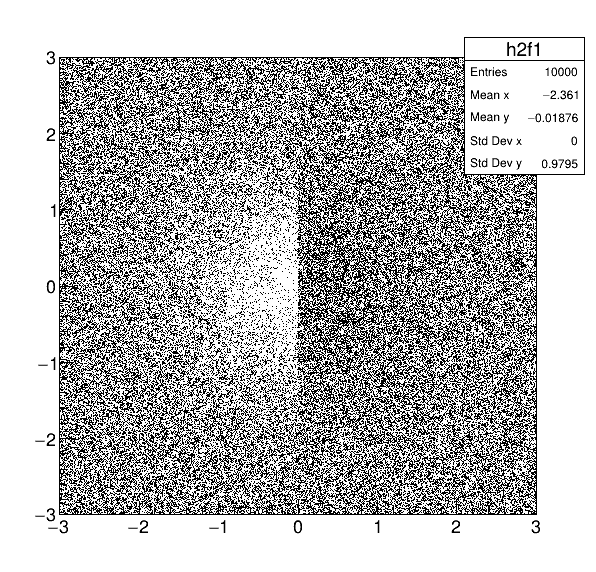

In [8]:
h2f1.Draw()
c2.Draw()
%jsroot off

## ARR:箭头模式。显示相邻单元格之间的梯度。

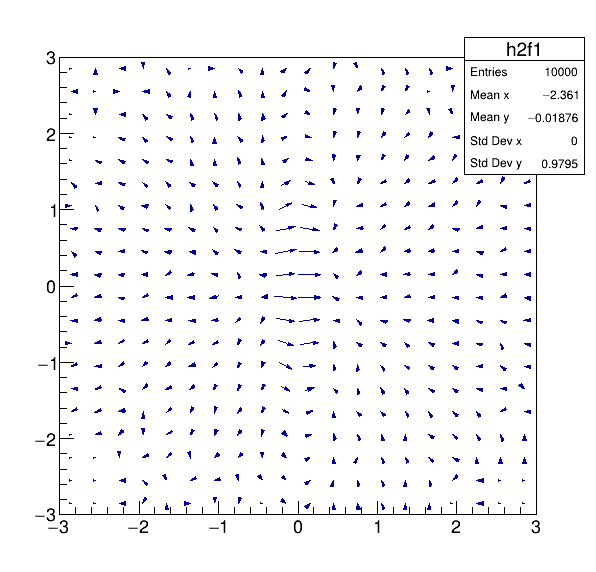

In [9]:
h2f1.Draw("ARR")
c2.Draw()

## 	VIOLIN:沿X轴绘制小提琴图

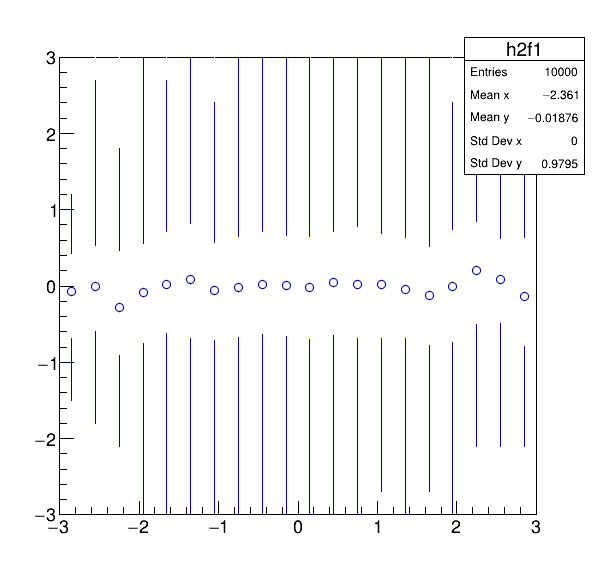

In [10]:
h2f1.Draw("VIOLIN")
c2.Draw()

## MOLLWEIDE:通过Mollweide投影绘制轮廓。

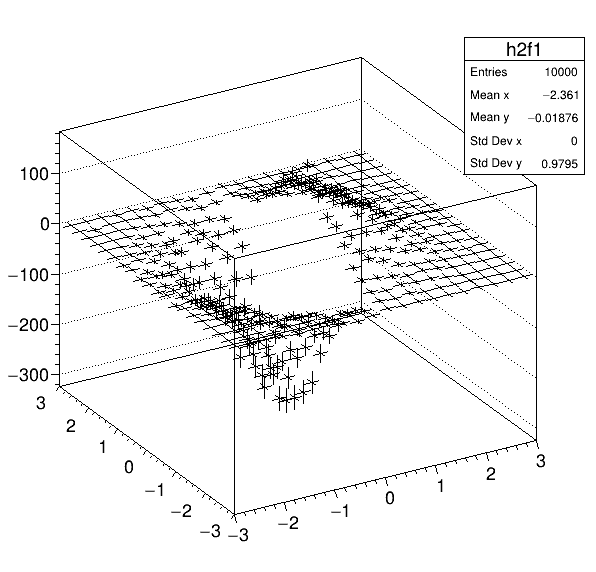

In [11]:
h2f1.Draw("MOLLWEIDE")
c2.Draw()

# 1D和2D共同支持选项

| 选项    | 描述                                                                                                            |
| ------- | --------------------------------------------------------------------------------------------------------------- |
| "E"     | 绘制误差条。                                                                                                   |
| "AXIS"  | 仅绘制坐标轴。                                                                                                 |
| "AXIG"  | 仅绘制网格（如果请求了网格）。                                                                               |
| "HIST"  | 当直方图有误差时，默认情况下可视化为带有误差条。要在没有误差的情况下可视化它，请将选项 "HIST" 与所需选项一起使用（例如 "hist same c"）。"HIST" 选项也可用于仅绘制直方图而不是相关的函数。 |
| "FUNC"  | 当直方图有拟合函数时，此选项允许仅绘制拟合结果。                                                             |
| "SAME"  | 与前一个图像叠加在同一画布上。                                                                               |
| "SAMES" | 与 "SAME" 相同，并绘制统计框。                                                                               |
| "PFC"   | 调色板填充颜色：直方图的填充颜色取自当前调色板。                                                           |
| "PLC"   | 调色板线颜色：直方图的线颜色取自当前调色板。                                                               |
| "PMC"   | 调色板标记颜色：直方图的标记颜色取自当前调色板。                                                           |
| "LEGO"  | 绘制带有隐藏线的乐高图。                                                                                   |
| "LEGO1" | 绘制带有隐藏表面的乐高图。                                                                               |
| "LEGO2" | 使用颜色显示单元格内容的乐高图。当与任何LEGO选项一起使用选项 "0" 时，不会绘制空的箱子。               |
| "LEGO3" | 绘制带有隐藏表面的乐高图，类似于LEGO1，但不绘制每个乐高条的边界线。                                       |
| "LEGO4" | 绘制带有隐藏表面的乐高图，类似于LEGO1，但没有每个乐高条的阴影效果。                                       |
| "TEXT"  | 将箱子内容绘制为文本（格式通过gStyle->SetPaintTextFormat设置）。                                           |
| "TEXTnn" | 以角度nn（0 < nn <= 90）绘制箱子内容作为文本。                                                             |
| "X+"    | X轴绘制在绘图的顶部。                                                                                         |
| "Y+"    | Y轴绘制在绘图的右侧。                                                                                         |
| "MIN0"  | 将Y轴的最小值设为0，相当于gStyle->SetHistMinimumZero()。                                                       |

In [12]:
c3 = TCanvas("c3", "c3", 800, 600)
c3.Divide(2, 1)
hz1 = TH1F("hz1", "", 20, -3, 3)
hz2 = TH2F("hz2", "", 20, -3, 3, 20, -3, 3)
hz1.SetFillColor(kBlue)
hz2.SetFillColor(kBlue)
for i in range(10000):
    x = gRandom.Gaus(0, 1)
    y = gRandom.Gaus(0, 1)
    if x > 0:
        hz1.Fill(x, 1)
        hz2.Fill(x, y, 1)
    else:
        hz1.Fill(x, -1)  # 权重为-1
        hz2.Fill(x, y, -2)  # 权重为 -2

## 默认选项

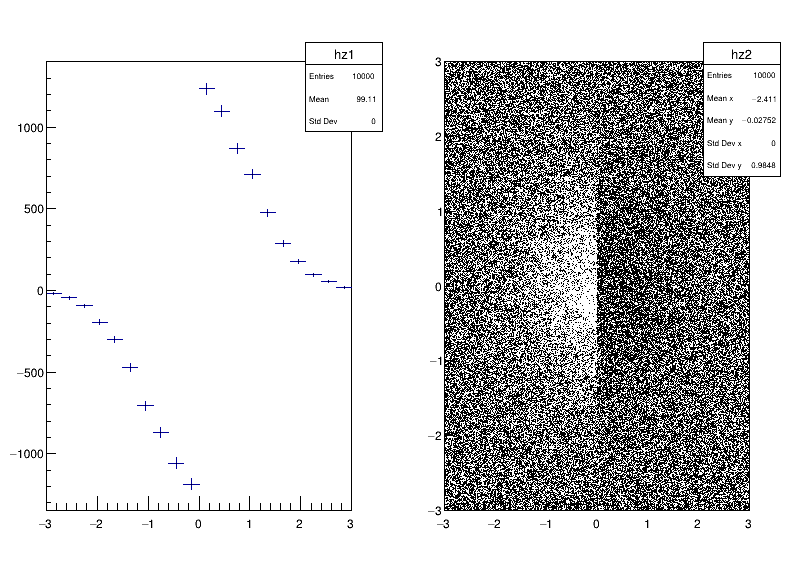

In [13]:
c3.cd(1)
hz1.Draw()
c3.cd(2)
hz2.Draw()
c3.Draw()

## LEGO2:使用颜色显示单元格内容的乐高图

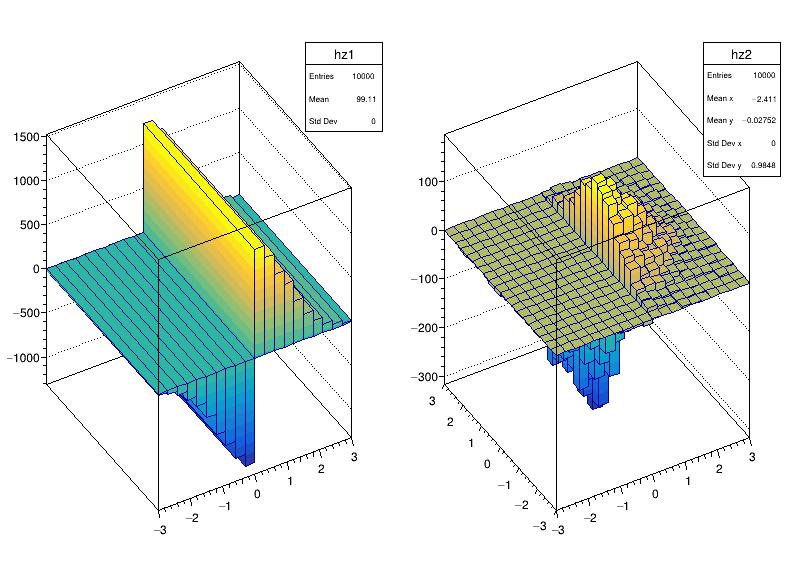

In [14]:
c3.cd(1)
hz1.Draw("LEGO2 MIN0")
c3.cd(2)
hz2.Draw("LEGO2 MIN0")
c3.Draw()

# 3D支持选项
| 选项    | 描述                                                                                                   |
| ------- | ------------------------------------------------------------------------------------------------------ |
| " "     | 默认选项（彩色绘图）。                                                                                 |
| "ISO"   | 绘制经过3D直方图的Gouraud着色的3D等值面。它在以下值处绘制一个表面：SumOfWeights/(NbinsX*NbinsY*NbinsZ)。   |
| "BOX"   | 为每个单元格绘制一个体积，其大小与内容的绝对值成比例。使用隐藏线算法。                              |
| "BOX1"  | 与BOX相同，但使用隐藏表面算法。                                                                       |
| "BOX2"  | 方框的颜色根据箱子的内容从当前调色板中选择。                                                             |
| "BOX2Z" | 与 "BOX2" 相同。此外，还绘制颜色调色板。                                                               |
| "BOX3"  | 与BOX1相同，但不绘制每个乐高条的边界线。                                                               |
| "LEGO"  | 与BOX相同。                                                                                           |

In [15]:
c06 = TCanvas("c06", "c06", 400, 400)
gStyle.SetOptStat(0)  # 控制统计信息显示
h3scat = TH3F("hs3cat", "Option SCAT", 15, -2, 2, 15, -2, 2, 15, 0, 4)
x_pre, y_pre = ctypes.c_float(), ctypes.c_float()
for i in range(10000):
    gRandom.Rannor(x_pre, y_pre)
    x = x_pre.value
    y = y_pre.value
    z = x * x + y * y
    h3scat.Fill(x, y, z)

## 默认选项

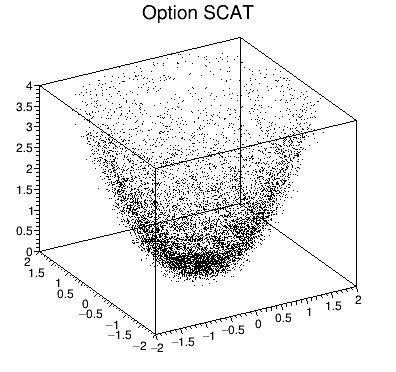

In [16]:
h3scat.Draw()
c06.Draw()

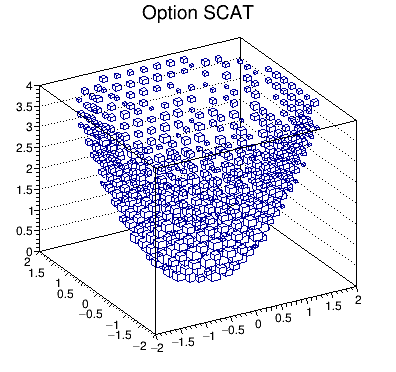

In [17]:
h3scat.Draw("BOX")
c06.Draw()

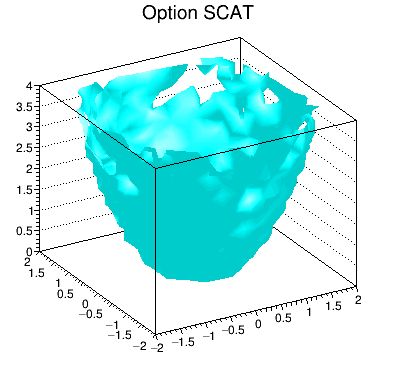

In [18]:
h3scat.SetFillColor(kCyan)
h3scat.Draw("ISO")
c06.Draw()

# TGraph

| 选项     | 描述                                                                                          |
| -------- | ----------------------------------------------------------------------------------------------- |
| "TRI"    | 使用填充区域绘制 Delaunay 三角形。使用隐藏表面绘制技术。表面以当前填充区域颜色绘制。每个三角形的边缘以当前线颜色绘制。  |
| "TRIW"   | 以线框形式绘制 Delaunay 三角形。                                                                 |
| "TRI1"   | 用颜色级别绘制 Delaunay 三角形。每个三角形的边缘以当前线颜色绘制。                              |
| "TRI2"   | 使用颜色级别绘制 Delaunay 三角形。                                                                |
| "P"      | 在每个顶点绘制一个标记。                                                                         |
| "P0"     | 在每个顶点绘制一个圆圈。每个圆圈的背景是白色的。                                               |
| "PCOL"   | 在每个顶点绘制一个标记。每个标记的颜色根据其Z坐标位置定义。                                   |
| "LINE"   | 绘制一个3D折线。                                                                                 |
| "CONT5"  | 使用Delaunay三角形绘制轮廓图。                                                                  |

In [19]:
c3 = TCanvas("c3", "c3", 600, 600)
x, y, z, P = 6.0, 6.0, 6.0, 6.0
np = 200
g3 = TGraph2D()
g3.SetTitle("Graph title; X axis title; Y axis title; Z axis title")
r = TRandom()
for N in range(np):
    x = 2 * P * (r.Rndm(N)) - P
    y = 2 * P * (r.Rndm(N)) - P
    z = (sin(x) / x) * (sin(y) / y) + 0.2
    g3.SetPoint(N, x, y, z)  # N指序号
gStyle.SetPalette(1)
%jsroot off

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


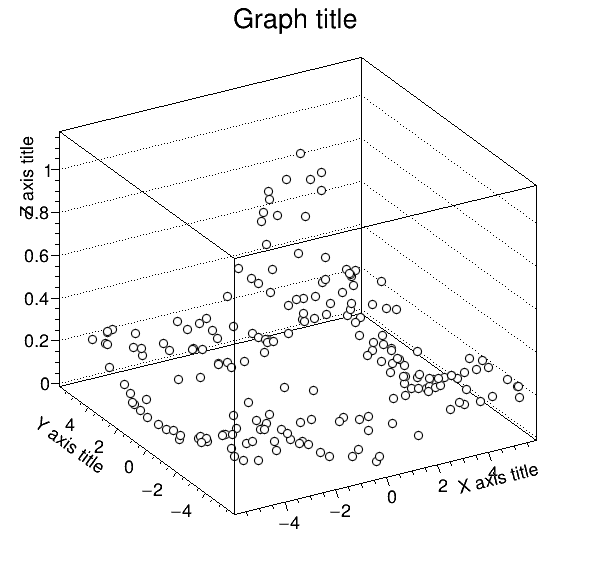

In [20]:
g3.Draw()
c3.Draw()

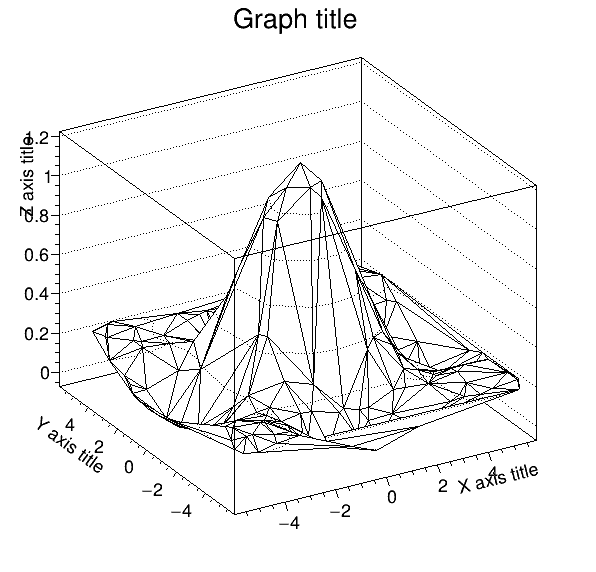

In [21]:
g3.Draw("TRI")
c3.Draw()

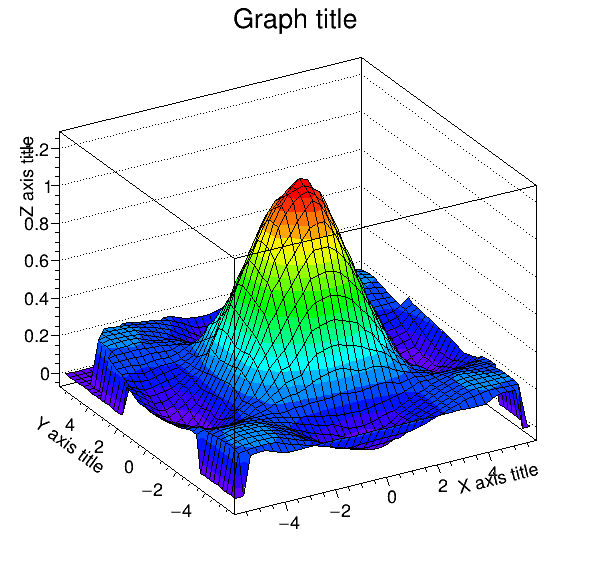

In [22]:
g3.Draw("surf1")
c3.Draw()